# AI-Based Resume Screening Application

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("job_applicant_dataset.csv")
df

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
...,...,...,...,...,...,...,...,...,...
9995,Jada Williams,30,Female,Negroid/Black,Ghanaian,"Proficient in Biology, Regulatory Compliance, ...",Biomedical Engineer,A Biomedical Engineer designs and develops med...,0
9996,Jaden Carter,52,Male,Negroid/Black,Nigerian,"Proficient in Communication, Teamwork, Lesson ...",Teacher,A Teacher shapes the future of students by del...,0
9997,Mia Foster,25,Female,White/Caucasian,German,"Proficient in Medical Terminology, Critical Th...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
9998,Stella Green,51,Female,White/Caucasian,Irish,"Proficient in Exercise Programming, Motivation...",Fitness Coach,A Fitness Coach is responsible for helping cl...,1


Get Unique Job Roles from the Dataset

In [2]:
df['Job Roles'].unique()

array(['Fitness Coach', 'Physician', 'Financial Analyst',
       'Supply Chain Manager', 'Database Administrator', 'Architect',
       'Operations Manager', 'Cybersecurity Analyst', 'Software Engineer',
       'Urban Planner', 'Machine Learning Engineer', 'Personal Trainer',
       'Biomedical Engineer', 'Nurse', 'Systems Analyst',
       'Product Manager', 'Content Writer', 'Pharmacist', 'Chef',
       'AI Researcher', 'Data Analyst', 'Psychologist', 'Civil Engineer',
       'Accountant', 'Graphic Designer', 'Web Developer',
       'Cloud Architect', 'AI Specialist', 'Dentist', 'Pilot',
       'UX Designer', 'Teacher', 'HR Specialist', 'Veterinarian',
       'Environmental Scientist', 'Legal Consultant',
       'Sales Representative', 'Robotics Engineer', 'SEO Specialist',
       'Business Analyst', 'Customer Service Representative',
       'Marketing Manager', 'Social Worker', 'Electrician', 'Journalist',
       'Event Planner', 'Lawyer', 'Mechanical Engineer',
       'Construction M

Check Data Types of DataFrame Columns

In [3]:
df.dtypes

Job Applicant Name    object
Age                    int64
Gender                object
Race                  object
Ethnicity             object
Resume                object
Job Roles             object
Job Description       object
Best Match             int64
dtype: object

Display Summary Information About the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Applicant Name  10000 non-null  object
 1   Age                 10000 non-null  int64 
 2   Gender              10000 non-null  object
 3   Race                10000 non-null  object
 4   Ethnicity           10000 non-null  object
 5   Resume              10000 non-null  object
 6   Job Roles           10000 non-null  object
 7   Job Description     10000 non-null  object
 8   Best Match          10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


Count Missing Values in Each Column

In [5]:
# Check for missing values
df.isnull().sum()

Job Applicant Name    0
Age                   0
Gender                0
Race                  0
Ethnicity             0
Resume                0
Job Roles             0
Job Description       0
Best Match            0
dtype: int64

Count Duplicate Rows in the DataFrame

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates rows",duplicates)

Number of duplicates rows 0


Count Negative Values in Numeric Columns

In [7]:
# Check for negative values in numeric columns
numeric_df= df.select_dtypes(include=['number'])
 
negative_counts=(numeric_df < 0).sum()
 
negative_counts

Age           0
Best Match    0
dtype: int64

Count of Each Category in 'Best Match' Column

In [8]:
# Count of Each Category in 'Best Match' Column
df["Best Match"].value_counts()

Best Match
0    5150
1    4850
Name: count, dtype: int64

Boxplot of Numeric Columns to Detect Outliers

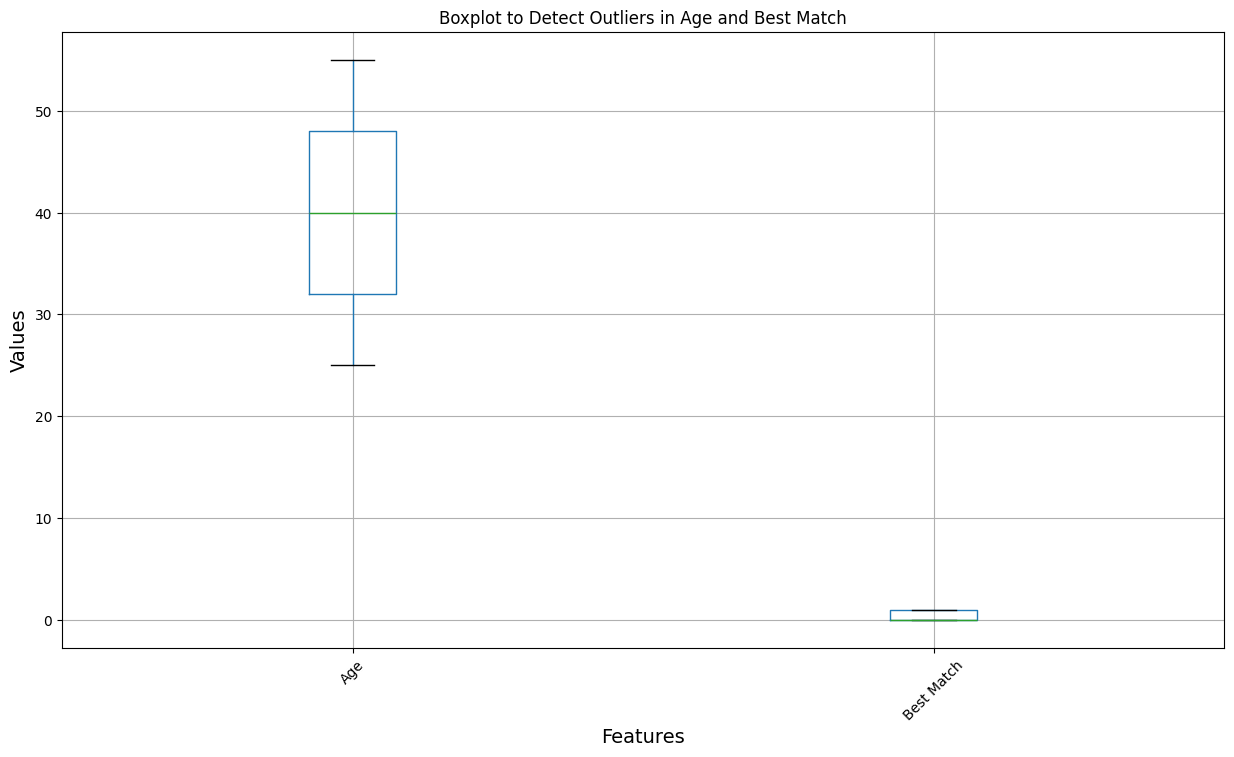

In [9]:
# Check for outliers using boxplot
import matplotlib.pyplot as plt
numeric_colums = ["Age", "Best Match"]

plt.figure(figsize=(15,8))
df[numeric_colums].boxplot(rot=45)
plt.title("Boxplot to Detect Outliers in Age and Best Match")
plt.ylabel("Values", fontsize=14)
plt.xlabel("Features", fontsize=14)

plt.show()

Text Preprocessing for Resume and Job Description Columns

In [10]:
import re # For using regular expressions to clean text.
import nltk
from nltk.corpus import stopwords # stopwords: To remove commonly used words that may not carry meaningful information (e.g., "the", "and", "is").
from nltk.tokenize import word_tokenize # word_tokenize: To split text into individual words (tokens).
from nltk.stem import PorterStemmer, WordNetLemmatizer # PorterStemmer: To reduce words to their root form (e.g., "running" to "run"). WordNetLemmatizer: To convert words to their base or dictionary form (e.g., "better" to "good").

# Download necessary NLTK resources
nltk.download("stopwords") # Download the stopwords corpus.
nltk.download("punkt") # re-trained tokenizer model.
nltk.download("wordnet") # Download the WordNet corpus for lemmatization.

# Initialize stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words("english")) # Set of English stopwords.
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Apply  lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a string
    return " ".join(words)

# Apply text preprocessing to Resume and Job Description columns
df["Resume"] = df["Resume"].apply(preprocess_text)
df["Job Description"] = df["Job Description"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SanjaySiramdasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SanjaySiramdasu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SanjaySiramdasu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
df.head()

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,proficient injury prevention motivation nutrit...,Fitness Coach,fitness coach responsible helping client achie...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,proficient healthcare pharmacology medical ter...,Physician,diagnose treat illness prescribe medication pr...,0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,proficient forecasting financial modelling exc...,Financial Analyst,financial analyst responsible evaluating finan...,0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,proficient budgeting supply chain optimization...,Supply Chain Manager,supply chain manager oversees entire supply ch...,1
4,James Davis,49,Male,White/Caucasian,English,proficient logistics negotiation procurement s...,Supply Chain Manager,supply chain manager oversees entire supply ch...,1


In [12]:
# Drop unnecessary columns
df = df.drop(columns=["Job Applicant Name", "Race", "Ethnicity"])
df.head()

,Age,Gender,Resume,Job Roles,Job Description,Best Match
0,29,Male,proficient injury prevention motivation nutrit...,Fitness Coach,fitness coach responsible helping client achie...,0
1,31,Male,proficient healthcare pharmacology medical ter...,Physician,diagnose treat illness prescribe medication pr...,0
2,46,Female,proficient forecasting financial modelling exc...,Financial Analyst,financial analyst responsible evaluating finan...,0
3,43,Male,proficient budgeting supply chain optimization...,Supply Chain Manager,supply chain manager oversees entire supply ch...,1
4,49,Male,proficient logistics negotiation procurement s...,Supply Chain Manager,supply chain manager oversees entire supply ch...,1


Encode Categorical Columns 'Job Roles' and 'Gender' Using Label Encoding

In [13]:
# Step 1: Convert Job Roles, Gender into Numerical Values
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_jobrole = LabelEncoder()
df["Job Roles"] = label_encoder_jobrole.fit_transform(df["Job Roles"])
df["Gender"] = label_encoder_gender.fit_transform(df["Gender"])
df.head()

,Age,Gender,Resume,Job Roles,Job Description,Best Match
0,29,1,proficient injury prevention motivation nutrit...,21,fitness coach responsible helping client achie...,0
1,31,1,proficient healthcare pharmacology medical ter...,34,diagnose treat illness prescribe medication pr...,0
2,46,0,proficient forecasting financial modelling exc...,20,financial analyst responsible evaluating finan...,0
3,43,1,proficient budgeting supply chain optimization...,44,supply chain manager oversees entire supply ch...,1
4,49,1,proficient logistics negotiation procurement s...,44,supply chain manager oversees entire supply ch...,1


In [14]:
# Step 2: Scale numerical column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])  # 2D input for scaler
df.head()

,Age,Gender,Resume,Job Roles,Job Description,Best Match
0,-1.234037,1,proficient injury prevention motivation nutrit...,21,fitness coach responsible helping client achie...,0
1,-1.010585,1,proficient healthcare pharmacology medical ter...,34,diagnose treat illness prescribe medication pr...,0
2,0.665306,0,proficient forecasting financial modelling exc...,20,financial analyst responsible evaluating finan...,0
3,0.330128,1,proficient budgeting supply chain optimization...,44,supply chain manager oversees entire supply ch...,1
4,1.000485,1,proficient logistics negotiation procurement s...,44,supply chain manager oversees entire supply ch...,1


We apply **TF-IDF (Term Frequency–Inverse Document Frequency)** vectorization to the text in the **Resume** and **Job Description** columns. 

This converts the textual data into numerical feature vectors that can be used in machine learning models.

*max_features=5000* : Limits the number of unique words (features) to the top 5000 most important words (based on frequency).


In [15]:
# Step 3: TF-IDF for Resume & Job Description
from sklearn.feature_extraction.text import TfidfVectorizer

combined_text = pd.concat([df["Resume"], df["Job Description"]]) # Combine the text from both columns for TF-IDF vectorization
# Initialize TF-IDF Vectorizer with a maximum of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)
# Fit the vectorizer on the combined text
vectorizer.fit(combined_text)

# Transform the combined text into TF-IDF features
resume_vec = vectorizer.transform(df["Resume"]).toarray()
job_desc_vec = vectorizer.transform(df["Job Description"]).toarray()
print("TF-IDF transformation applied to Resume and Job Description columns successfully!")

TF-IDF transformation applied to Resume and Job Description columns successfully!


Combine TF-IDF Features and Split Data into Training and Testing Sets

In [16]:
# Step 4: Combine all features
from sklearn.model_selection import train_test_split

# numeric_features = df[["Age", "Gender", "Job Roles"]].values
X = np.hstack((resume_vec, job_desc_vec))
y = df["Best Match"]

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing sets created successfully")

Training and testing sets created successfully


Training XGBClassifier model

In [17]:
# Step 6: Model Training using XGBoost CLASSIFIER
# XGBoost is a powerful gradient boosting algorithm that is efficient and effective for classification tasks.
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize and train the XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# Fit the model on the training data
model.fit(X_train, y_train)
# Predict on the test data
y_pred = model.predict(X_test)

# Step 7: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1-Score:", f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.531
Precision: 0.5305980396182594
Recall: 0.5305676702975874
F1-Score: 0.5305488574520114


Training RidgeClassifier model

In [ ]:
# TRAINING THE MODEL USING RIDGE CLASSIFIER
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Ridge Classifier
ridge_model = RidgeClassifier(alpha=1.0)
# Fit the model on the training data
ridge_model.fit(X_train, y_train)
# Predict on the test data
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge Classifier
print("Ridge Regression Accuracy:", accuracy_score(y_test, ridge_y_pred))   
print("Ridge Regression Precision:", precision_score(y_test, ridge_y_pred, average="macro"))
print("Ridge Regression Recall:", recall_score(y_test, ridge_y_pred, average="macro"))
print("Ridge Regression F1-Score:", f1_score(y_test, ridge_y_pred, average="macro"))

Training RandomForestClassifier model

In [ ]:
# TRAINING THE MODEL USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1-Score:", f1_score(y_test, y_pred, average="macro"))

Training DecisionTreeClassifier model

In [ ]:
# TRAINING THE MODEL USING DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dt_model.fit(X_train, y_train)
# Predict on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree Classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1-Score:", f1_score(y_test, y_pred, average="macro"))

Testing the models by giving **test_sample** data

In [18]:
# Test Sample
test_sample = {
    # "Age": 23,
    # "Gender": "Male",
    # "Job Roles": "Fitness Coach",
    "Resume": "Proficient in Database Management, Troubleshooting, Optimization, Data Security, Database Design, with senior-level experience in the field. Holds a PhD degree. Holds certifications such as CompTIA Data+ Certification. Skilled in delivering results and adapting to dynamic environments.",
    "Job Description": "A Database Administrator (DBA) is responsible for managing and organizing large sets of data, ensuring that they are secure, easily accessible, and optimized for performance. You will design and maintain database systems, conduct backups, and troubleshoot any database issues that arise. The role requires in-depth knowledge of database management systems (DBMS), as well as a strong understanding of security protocols and data recovery techniques. You will work closely with IT teams to ensure that the database infrastructure supports business needs while maintaining efficiency and reliability. Strong attention to detail and problem-solving skills are essential in this role."
}

def is_valid_input(data):
    required_fields = ["Resume", "Job Description"]
    for field in required_fields:
        if not data.get(field) or str(data[field]).strip() == "":
            print(f"❌ Missing or empty input for: {field}")
            return False
    return True


if is_valid_input(test_sample):
    # # Apply same preprocessing as training
    # test_sample["Gender"] = preprocess_text(test_sample["Gender"])
    # test_sample["Job Roles"] = preprocess_text(test_sample["Job Roles"])
    # test_sample["Resume"] = preprocess_text(test_sample["Resume"])
    # test_sample["Job Description"] = preprocess_text(test_sample["Job Description"])

    # Transform using fitted encoders & vectorizer
    # test_gender_encoded = label_encoder_gender.transform([test_sample["Gender"]]).reshape(1, -1)
    # test_jobrole_encoded = label_encoder_jobrole.transform([test_sample["Job Roles"]]).reshape(1, -1)
    # test_age_scaled = scaler.transform([[test_sample["Age"]]])

    test_resume_vec = vectorizer.transform([test_sample["Resume"]]).toarray()
    test_jobdesc_vec = vectorizer.transform([test_sample["Job Description"]]).toarray()

    # Combine all features
    test_features = np.hstack((test_resume_vec, test_jobdesc_vec))

    # Predict
    prediction = model.predict(test_features)[0]
    print(f"🎯 Predicted Best Match Score: {prediction:.2f}")
else:
    print("⚠️ Please provide all required input fields for accurate prediction.")




🎯 Predicted Best Match Score: 0.00


In [20]:
import joblib

joblib.dump(model, "model/model.pkl")
joblib.dump(vectorizer, "model/vectorizer.pkl")

['model/vectorizer.pkl']

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import joblib
# resumes = df["Resume"].tolist()
# job_descriptions = df["Job Description"].tolist()
# vectorizer = TfidfVectorizer(max_features=5000)
# vectorizer.fit(resumes + job_descriptions)

# # Save it again import joblib
# joblib.dump(vectorizer, "ResumeScreeningApp/model/vectorizer.pkl")

In [ ]:
# model.fit(X_train, y_train)
# joblib.dump(model, "ResumeScreeningApp/model/model.pkl")